In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rebound
from saturn_system import m_sat, a_sat, R_eq_saturn

Text(0, 0.5, '$Q$')

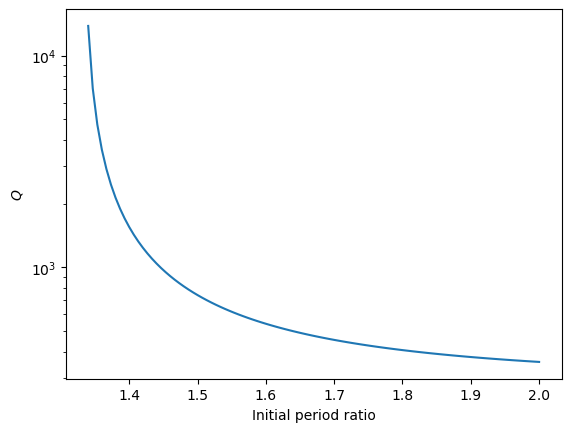

In [2]:
sim = rebound.Simulation()
sim.units = ('msaturn', 'km', 'yr')
beta0 = np.linspace(1.34, 2.0, 100)
age = 4.5e9
a1 = (3/4)**(2/3)*a_sat['hyperion']
a10 = beta0**(-2/3)*a_sat['hyperion']
k2_over_Q_touch = 2/39*m_sat['titan']**-1*(sim.G)**-0.5*R_eq_saturn**-5*age**-1*(a1**(13/2) - a10**(13/2))
plt.plot(beta0, 0.34/k2_over_Q_touch)
plt.yscale('log')
plt.xlabel(r'Initial period ratio')
plt.ylabel(r'$Q$')

In [3]:
def init_a_rat(init_per_rat):
    return (4/(3*init_per_rat))**(2/3)*np.exp(-4*0.1**2)

def Q_over_k2(init_per_rat):
    return 39*np.pi/(1 - (4/3/(init_per_rat))**(26/3)*np.exp(-26*0.1**2))*m_sat['titan']*(R_eq_saturn/a_sat['titan'])**5*(4.5e9)/(15.95/365.25)

In [4]:
k2 = 0.382
Q_over_k2(3/2)*k2

461.6020656991018

In [5]:
def t_lock(init_per_rat):
    return 4.5*(init_a_rat(init_per_rat))**3

In [6]:
print(t_lock(4/3))
print(t_lock(3/2))

3.9911419652272087
3.153494886105448


In [7]:
init_a_rat(4/3)

0.9607894391523232

In [8]:
(np.array([1,2,3])/4.5)**(1/3) * a_sat['titan']/R_eq_saturn

array([12.28006647, 15.47191424, 17.7109206 ])

Text(0, 0.5, 'Hyperion semi-major axis ($R_S$)')

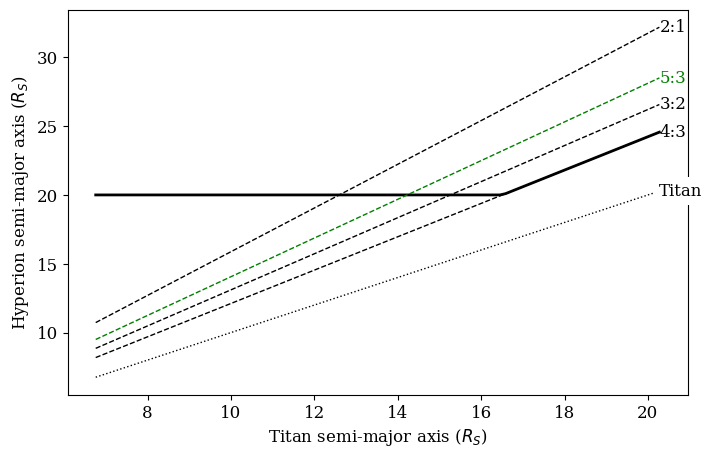

In [48]:
plt.rcParams.update({'font.family': 'serif', 'font.size': 12})
fig, ax = plt.subplots(figsize=(8,5))
titan_a = np.linspace(a_sat['titan']/3, a_sat['titan'], 100)/R_eq_saturn
hyperion_a = np.maximum((4/3)**(2/3)*titan_a, 20)
ax.plot(titan_a, hyperion_a, c='k', lw=2)
ax.plot(titan_a, titan_a, color='black', linestyle='dotted', lw=1)
ax.plot(titan_a, titan_a*(2/1)**(2/3), color='black', linestyle='dashed', lw=1)
ax.plot(titan_a, titan_a*(3/2)**(2/3), color='black', linestyle='dashed', lw=1)
ax.plot(titan_a, titan_a*(4/3)**(2/3), color='black', linestyle='dashed', lw=1)
# ax.plot(titan_a, titan_a*(5/4)**(2/3), color='black', linestyle='dashed', lw=1)
ax.plot(titan_a, titan_a*(5/3)**(2/3), color='g', linestyle='dashed', lw=1)
ax.text(titan_a[-1], titan_a[-1], 'Titan', color='black', va='center', ha='left', bbox=dict(facecolor='white', edgecolor='none'))
ax.text(titan_a[-1], titan_a[-1]*(2/1)**(2/3), '2:1', color='black', va='center', ha='left')
ax.text(titan_a[-1], titan_a[-1]*(3/2)**(2/3), '3:2', color='black', va='center', ha='left')
ax.text(titan_a[-1], titan_a[-1]*(4/3)**(2/3), '4:3', color='black', va='center', ha='left')
# ax.text(titan_a[-1], titan_a[-1]*(5/4)**(2/3), '5:4', color='black', va='center', ha='left')
ax.text(titan_a[-1], titan_a[-1]*(5/3)**(2/3), '5:3', color='green', va='center', ha='left')
# ax.set_xscale('log'); ax.set_yscale('log')
ax.set_xlabel(r'Titan semi-major axis ($R_S$)')
ax.set_ylabel(r'Hyperion semi-major axis ($R_S$)')